In [1]:
import os
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical
import random
import numpy as np

In [2]:
category = os.listdir('dataset/train')
category

['pants', 'shirt', 'shorts', 't-shirt']

In [3]:
img = os.listdir('dataset/train/'+category[0])[0]
img

'01.jpg'

In [4]:
def preprocessing(dirpath, categories):
    array = []
    for cat in categories:
        path = os.path.join(dirpath, cat)
        label = categories.index(cat)  # Numeric label
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            imgarray = cv2.imread(img_path)/255.0
            imgarray = cv2.resize(imgarray, (224, 224))  # Ensure consistent size
            array.append([imgarray, label])
    random.shuffle(array)  # Shuffle before splitting
    features, labels = zip(*array)  # Separate features and labels
    return np.array(features), np.array(labels)


In [5]:
X_train, y_train = preprocessing('dataset/train', category)
X_test, y_test = preprocessing('dataset/test', category)


In [6]:
y_train = to_categorical(y_train, num_classes=len(category))
y_test = to_categorical(y_test, num_classes=len(category))


In [7]:
len(X_train), len(X_test)

(160, 40)

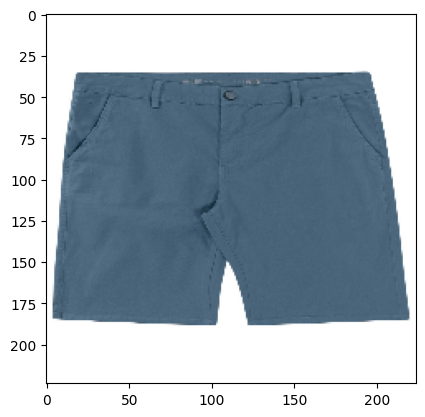

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [9]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNet
input_layer = layers.Input(shape=(224, 224, 3))

base_model = MobileNet(weights = 'imagenet', include_top = False, input_tensor = input_layer)

C:\Users\Asus\AppData\Local\Temp\ipykernel_25436\400360203.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights = 'imagenet', include_top = False, input_tensor = input_layer)


In [10]:
base_model.trainable = False

In [11]:
model = models.Sequential(
    [  
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1024, activation = 'relu'),
        layers.Dense(4, activation='softmax')
    ]
)
print(base_model.input)

[<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor>]


In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
history = model.fit(
    X_train, y_train, batch_size=32,
    validation_split=0.1,
    epochs=10,
    verbose=1
)


Epoch 1/10


f:\Cloth Similarity\cloth_env\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5022 - loss: 1.3682 - val_accuracy: 1.0000 - val_loss: 0.0959
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 845ms/step - accuracy: 0.9580 - loss: 0.1312 - val_accuracy: 1.0000 - val_loss: 0.0160
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 794ms/step - accuracy: 1.0000 - loss: 0.0229 - val_accuracy: 1.0000 - val_loss: 0.0479
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 814ms/step - accuracy: 0.9946 - loss: 0.0234 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 790ms/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 810ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 862ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0142
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 739ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0185
Epoch 

In [14]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - accuracy: 0.9729 - loss: 0.0293


[0.027016621083021164, 0.9750000238418579]

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,389,966 (24.38 MB)

 Trainable params: 1,053,700 (4.02 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 2,107,402 (8.04 MB)

In [27]:
# Ensure the image preprocessing is correct
img = cv2.imread('dataset/train/pants/01.jpg') / 255.0
imgarray = cv2.resize(img, (224, 224))
imgarray = np.expand_dims(imgarray, axis=0)  # Add batch dimension
imgarray = tf.cast(imgarray, tf.float32)


In [30]:
feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=base_model.output)

features = feature_extractor.predict(imgarray)

print(features.shape) 


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
(1, 7, 7, 1024)


In [33]:
features.flatten().shape

(50176,)

In [34]:
feature_extractor.save('feature_extractor.keras')